![Curso de Visión Artificial](imagenes/encabezado.png)




# Filtrado Espacial: Suavizado y Realzado

Las operaciones de filtrado son comúnmente usadas en el preprocesamiento de imágenes tanto como para eliminar el ruido, como para realzar los objetos y sus características visuales.


## Filtrado Local (Operaciones de Vecindad)

Cuando se habla de Filtrado "local" se hace referencia a aquellas operaciones en las que el valor de un píxel se ajusta con base en los píxeles que están su vecindario. La influencia que tiene cada uno de los píxeles en un vecindario está determinada por la "máscara" o el "kernel" de convolución.

Antes de revisar las funciones que provee `skimage` para el filtrado de imágenes es importante que se familiarice completamente con la operación de convolución. 


<div style="padding:10px; border-radius:10px; border:2px solid #A43D39; background:#EEEEEE">
<span style="color:#A43D39"><h3>**Nota:**</h3></span> Tenga presente que este tipo de operaciones se realizan solo sobre imágenes en niveles de gris, por lo tanto, si requiere aplicarlas sobre imágenes a color debe aplicar la operación por separado a cada canal. </div>

Ahora sí, empecemos ... !

In [2]:
# Siempre que usemos matplotlib en Jupyter es necesario poner esta línea antes de cualquier otra
%matplotlib inline

# Importamos las bibliotecas necesarias y les asigamos un alias
import skimage                           # Biblioteca para la manipulación de imágenes
import numpy as np                       # Biblioteca para la manipulación de matrices

# Importamos algunos paquetes específicos
from matplotlib import pyplot as plt     # Biblioteca para crear graficas y mostrar las imágenes en pantalla
from skimage import data                 # Paquete con imágenes de prueba
from skimage import io                   # Paquete para lectura/escritura de imágenes

from skimage import color                # Paquete con las operaciones de transformaciones entre espacios de color
from skimage import exposure             # Paquete con las funciones para calcular y alterar el histograma

import skdemo                            # Paquete ESPECIAL ADJUNTO con algunas funciones extra de visualización

####################
from skimage import filters              # Paquete que contiene las máscaras y filtros de suavizado y realzado
from skimage import util                 # Paquete que contiene las funciones para cambiar el tipo de dato de las imágenes

from scipy import ndimage                # Usamos esta biblioteca para realizar la operación de convolución


# Con este nos aseguramos que las imagenes en niveles de gris, se vean como tal siempre.
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'


### Convolución de imágenes

La convolución es una de las operaciones  más críticas y fundamentales en  el procesamiento de imágenes y la visión artificial. El término en sí mismo tiende a asustar a la gente, de hecho, la palabra  parece tener una connotación negativa. Sin embargo, **las convoluciones son todo menos atemorizantes**. En realidad, son bastante fáciles de entender.

En palabras simples, una convolución (de imágenes) es simplemente la multiplicación, uno a uno, de los elementos de dos matrices seguida de una suma.

Toda operación de convolución tiene un `kernel` que es, regularmente, una matriz muchos más pequeña que la imagen original. De acuerdo a los valores en el `kernel`, este se puede usar bien sea para desenfocar la imagen (suavisarla), hacerla más nítida (realzarla) o para detectar los bordes en la misma, entre otras operaciones. Empecemos con un `kernel` de suavizado: el `kernel` de un <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> filtro promedio</span>:

![Kernel de Suavizado](imagenes/00.png)


El resultado de la convolución de una imagen se calcula de la siguiente manera para cada píxel en la imagen:
* Centre el kernel en el píxel
* Multiplique uno a uno los valores de los píxeles de la imagen con el valor del kernel
* Sume los resultados de las multiplicaciones
* En la imagen de salida, reemplace el píxel central por el valor de la suma

Este proceso se ejemplifica en la siguiente figura:

![Paso 2 Convolucion](imagenes/2.jpg)


### Ejemplo de Convolución

Veamos como aplciar una convolución en una pequeña imagen:

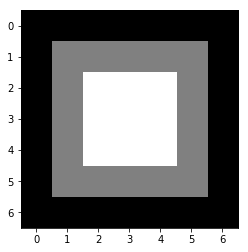

In [3]:
# creamos una imagen de tipo FLOTANTE
img = np.zeros((7, 7), dtype=float)
img[1:6, 1:6] = 0.5
img[2:5, 2:5] = 1

plt.imshow(img)

<div style="padding:10px; border-radius:10px; border:2px solid #4BACC6; background:#EEEEEE">
<span style="color:#4BACC6" ><h3>**Para Tener en Cuenta:**</h3></span> En este ejemplo usamos una imagen de tipo <span style="color:green; font-family:Courier new" >float</span>, porque la operación de convolución puede generar valores negativos o valores mayores a 255 (valores fuera del rango de una imagen tipo <span style="color:green; font-family:Courier new" >uint8</span>)</span>

In [4]:
# Creamos el kernel de convolución
# Nota: si no recuerda esto, revise nuevamente la Práctica 0
k = np.full((3,3), 1/9)

# Visualizamos la matriz de la imagen. Note como se hace el print ...
print ("Imagen Original: ")
print (np.array_str(img, precision=2))

# Visualizamos la matriz del kernel. Note como se hace el print ...
print ("\nKernel de Convolución:")
print (np.array_str(k, precision=2))

Imagen Original: 
[[0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.5 0.5 0.5 0. ]
 [0.  0.5 1.  1.  1.  0.5 0. ]
 [0.  0.5 1.  1.  1.  0.5 0. ]
 [0.  0.5 1.  1.  1.  0.5 0. ]
 [0.  0.5 0.5 0.5 0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0. ]]

Kernel de Convolución:
[[0.11 0.11 0.11]
 [0.11 0.11 0.11]
 [0.11 0.11 0.11]]


Ahora que tenemos la imagen y el kernel podemos aplicar la convolución:

Imagen Resultado:
[[0.06 0.11 0.17 0.17 0.17 0.11 0.06]
 [0.11 0.28 0.44 0.5  0.44 0.28 0.11]
 [0.17 0.44 0.72 0.83 0.72 0.44 0.17]
 [0.17 0.5  0.83 1.   0.83 0.5  0.17]
 [0.17 0.44 0.72 0.83 0.72 0.44 0.17]
 [0.11 0.28 0.44 0.5  0.44 0.28 0.11]
 [0.06 0.11 0.17 0.17 0.17 0.11 0.06]]


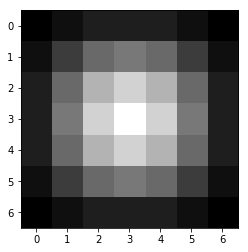

In [5]:
# Aplicamos la convolución
# Note que la función de convolución está en el paquete ndimage de scipy
out = ndimage.convolve(img, k, mode='constant', cval=0.0)

# Visualizamos la matriz de la imagen resultante
print ("Imagen Resultado:")
print (np.array_str(out, precision=2))

# Visualizamos la imagen de salida
plt.imshow(out)

Note que aplicar la convolución obtenemos una imagen suavizada (o desenfocada), esto se debe al tipo de kernel que utilizamos, el cual es el kernel de un <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> filtro promedio</span> con una máscara de 3x3.

En este sentido, debe quedar claro que este kernel de suavizado reemplaza el valor de cada píxel de la imagen por el promedio de los píxeles en un vecindario de tamaño 3x3.

### La Convolución en Acción

Ahora ejecute el siguiente demo, no trate de entenderlo, solo úselo para que vea como funciona la convolución.

**Nota:** Este demo ha sido tomado de los tutoriales de Scikit-Image en http://scikit-image.org 

In [6]:
#--------------------------------------------------------------------------
#  Convolution Demo
#--------------------------------------------------------------------------
from skimage import color
from scipy import ndimage as ndi
from matplotlib import patches

def mean_filter_demo(image, vmax=1):
    mean_factor = 1.0 / 9.0  # This assumes a 3x3 kernel.
    iter_kernel_and_subimage = iter_kernel(image)

    image_cache = []

    def mean_filter_step(i_step):
        while i_step >= len(image_cache):
            filtered = image if i_step == 0 else image_cache[-1][-1][-1]
            filtered = filtered.copy()

            (i, j), mask, subimage = next(iter_kernel_and_subimage)
            filter_overlay = color.label2rgb(mask, image, bg_label=0,
                                             colors=('cyan', 'red'))
            filtered[i, j] = np.sum(mean_factor * subimage)
            image_cache.append(((i, j), (filter_overlay, filtered)))

        (i, j), images = image_cache[i_step]
        fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
        
        for ax, imc in zip(axes, images):
            ax.imshow(imc, vmax=vmax)
            rect = patches.Rectangle([j - 0.5, i - 0.5], 1, 1, color='yellow', fill=False)
            ax.add_patch(rect)
            
        plt.show()
    return mean_filter_step


def mean_filter_interactive_demo(image):
    from ipywidgets import IntSlider, interact
    mean_filter_step = mean_filter_demo(image)
    step_slider = IntSlider(min=0, max=image.size-1, value=0)
    interact(mean_filter_step, i_step=step_slider)


def iter_kernel(image, size=1):
    """ Yield position, kernel mask, and image for each pixel in the image.

    The kernel mask has a 2 at the center pixel and 1 around it. The actual
    width of the kernel is 2*size + 1.
    """
    width = 2*size + 1
    for (i, j), pixel in iter_pixels(image):
        mask = np.zeros(image.shape, dtype='int16')
        mask[i, j] = 1
        mask = ndi.grey_dilation(mask, size=width)
        #mask[i, j] = 2
        subimage = image[bounded_slice((i, j), image.shape[:2], size=size)]
        yield (i, j), mask, subimage


def iter_pixels(image):
    """ Yield pixel position (row, column) and pixel intensity. """
    height, width = image.shape[:2]
    for i in range(height):
        for j in range(width):
            yield (i, j), image[i, j]


def bounded_slice(center, xy_max, size=1, i_min=0):
    slices = []
    for i, i_max in zip(center, xy_max):
        slices.append(slice(max(i - size, i_min), min(i + size + 1, i_max)))
    return slices



In [7]:
mean_filter_interactive_demo(img)

interactive(children=(IntSlider(value=0, description='i_step', max=48), Output()), _dom_classes=('widget-inter…

# Filtros de Suavizado

Los filtros de suavizado son aquellos que permiten suavizar los cambios en la imagen por lo que suelen tener un efecto de desenfoque en las imágenes. 

A este tipo de filtros también se les conoce como **filtros paso bajo**, esto debido a que dejan pasar las bajas frecuencias de la imagen (que representan los cambios suaves) pero eliminan o atenúan las altas frecuencias, que son los cambios bruscos y que normalmente representan el ruido y los bordes de la imagen. 

`Skimage` proporciona principalmente tres tipo de filtros de suavizado: El <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> Filtro Promedio</span> y el <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> Filtro Gaussiano</span> que son filtros lineales y el <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> Filtro Mediana</span> que es un filtro de orden estadístico.

## Filtro de Suavizado Promedio

En el ejemplo incial aplicamos a la imagen un filtro promedio de 3x3:


Con base en los resultados que obtuvimos se pueden hacer dos observaciones importantes cuando se aplica un filtro de suavizado promedio:
1. La intensidad de los píxeles más brillantes disminuyó
2. La intensidad de los píxeles oscuros, rodeados de píxeles más claros aumentó

Veamos la aplicación del filtro promedio en `Skimage`:


Tipo de dato de la imagen Original:  float64
Tipo de dato de la imagen convertida:  uint8


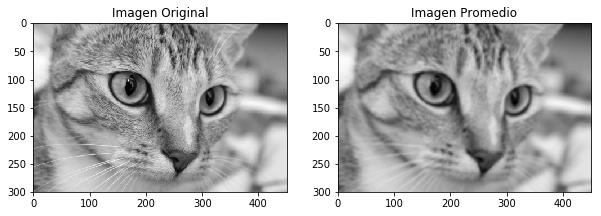

In [9]:
# Cargamos una de las imágenes en niveles de gris
cat = color.rgb2gray(data.chelsea())

# Revisamos el tipo de la imagen
print ("Tipo de dato de la imagen Original: ", img.dtype)

# Como la imagen es floante debemos pasarla a uint8 o untin16
# El tipo de la imagen debe cambiar porque la función solo recibe imágenes enteras
cat = util.img_as_ubyte(cat)
print ("Tipo de dato de la imagen convertida: ", cat.dtype)

# Aplicamos el filtro promedio de 5x5 usando skimage
avg = filters.rank.mean(cat, np.ones((5,5)))

# Mostramos las imágenes
skdemo.imshow_all(cat, avg, titles=["Imagen Original", "Imagen Promedio"])

Comparando la imagen original con la imagen filtrada, podemos ver que los detalles en esta última son más suaves: los bordes agudos (que son solo bordes entre los píxeles oscuros y brillantes) se suavizan porque los píxeles oscuros reducen la intensidad de los píxeles vecinos y los píxeles brillantes hacen lo contrario.


## Filtro de Suavizado Gaussiano

El filtro Gaussiano es el filtro clásico de suavizado y es muy similar al filtro promedio. Sin embargo, el filtro Gaussiano no pondera de igual manera a todos los píxeles en el vecindario: los píxeles qué están más cerca al píxel central tienen mayor peso que aquellos que están más alejados de este.

La fórmula para la generación del filtro Gaussiano es:

$$
k_{r, c} = \frac{1}{2\pi \sigma^2} \exp{\left(-\frac{r^2 + c^2}{2\sigma^2}\right)}
$$

Esta fórmula, que depende del tamaño del filtro y del parámetro $\sigma$, genera diferentes máscaras con formas como la que se muestra a continuación:

![Formula de Filtro Gaussiano](imagenes/filtroGauss.png)

Veamos un par de máscaras Gaussianas con diferentes valores de $\sigma$:


In [10]:
# Creamos una matriz de zeros y cambiamos el valor del píxel central
m = np.zeros((5,5))
m[2,2] = 1

# Usamos la función del paquete filters para generar la máscara
k_gauss = filters.gaussian(m, sigma=0.5)
print("Kernel con sigma = 0.5:\n", np.array_str(k_gauss, precision=3,  suppress_small=True))

# Variamos el tamaño de sigma
k_gauss = filters.gaussian(m, sigma=1)
print("\n\nKernel con sigma = 1:\n", np.array_str(k_gauss, precision=3, suppress_small=True))

Kernel con sigma = 0.5:
 [[0.    0.    0.    0.    0.   ]
 [0.    0.011 0.084 0.011 0.   ]
 [0.    0.084 0.619 0.084 0.   ]
 [0.    0.011 0.084 0.011 0.   ]
 [0.    0.    0.    0.    0.   ]]


Kernel con sigma = 1:
 [[0.003 0.013 0.022 0.013 0.003]
 [0.013 0.059 0.097 0.059 0.013]
 [0.022 0.097 0.159 0.097 0.022]
 [0.013 0.059 0.097 0.059 0.013]
 [0.003 0.013 0.022 0.013 0.003]]


Observe que entre mayor sea el parámetro $\sigma$, mayor es la cobertura del filtro. Este valor tiene un impacto directo en qué tanto se suaviza la imagen. Entre mayor sea el valor de $\sigma$, mayor será el suavizado en la imagen.

Observemos el comportamiento de este filtro en una pequeña imagen:

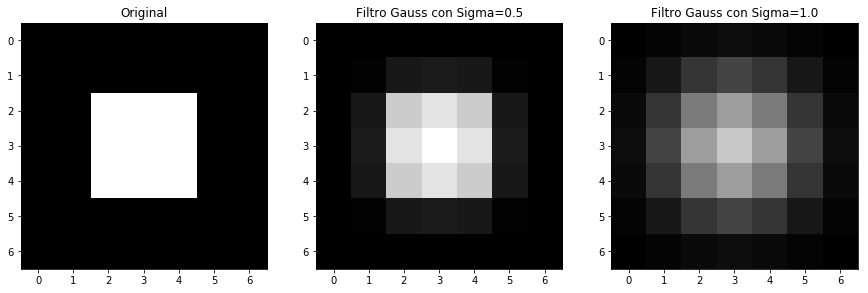

In [11]:
# Creamos la imagen de prueba
img = np.zeros((7, 7), dtype=float)
img[2:5, 2:5] = 0.5

# Filtramos la imagen usando un sigma=0.5
out_1 = filters.gaussian(img, sigma=0.5)

# Filtramos la imagen usando un sigma=1.0
out_2 = filters.gaussian(img, sigma=1.0)

# Visualizamos las imágenes
skdemo.imshow_all(img, out_1, out_2, titles=["Original", "Filtro Gauss con Sigma=0.5", "Filtro Gauss con Sigma=1.0"])


Note, como con un valor mayor de sigma, se suaviza más el contenido de la imagen.

Ahora vemos la comparación entre el filtro promedio de 5x5 y un filtro gaussiano con sigma = 1.



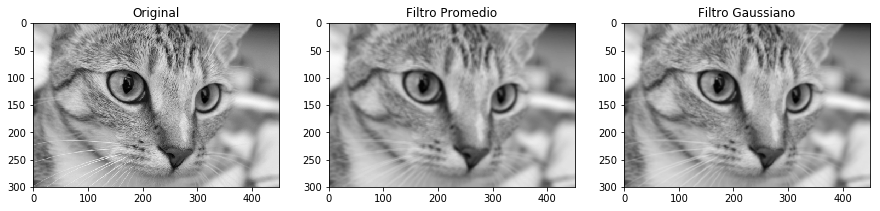

In [12]:
# Aplicamos el filtro Gaussiano en la imagen del gato
gauss = filters.gaussian(cat, sigma=1.0)

# Mostramos las imágenes
skdemo.imshow_all(cat, avg, gauss, titles=["Original", "Filtro Promedio", "Filtro Gaussiano"])

Probemos ahora en una imagen con ruido añadido:

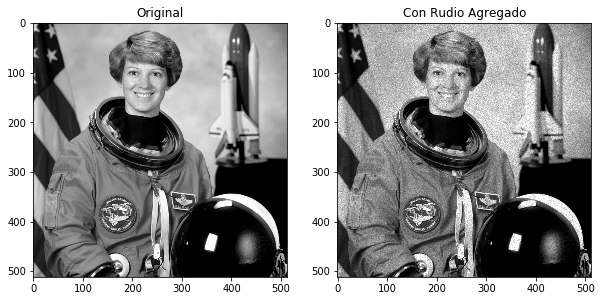

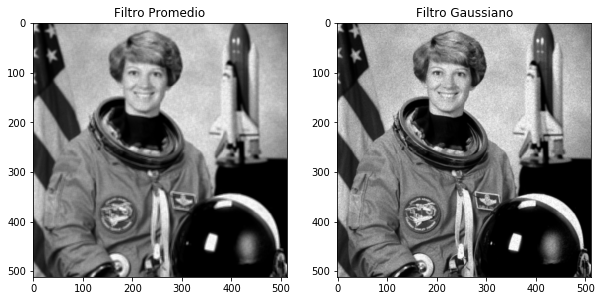

In [13]:
# Cargamos la imagen astronauta
ast = color.rgb2gray(data.astronaut())

# Agregamos ruido normal
ast_noised = util.random_noise(ast, mode="speckle")

# Filtramos la imagen con ruido usando un filtro promedio de 5x5
ast_avg = filters.rank.mean(ast_noised, np.ones((5,5)))

# Filtramos la imagen con ruido usando un filtro gaussiano
ast_gauss = filters.gaussian(ast_noised, sigma=1.0)

# Mostramos las imágenes
skdemo.imshow_all(ast, ast_noised, titles=["Original", "Con Rudio Agregado"])
skdemo.imshow_all(ast_avg, ast_gauss, titles=["Filtro Promedio", "Filtro Gaussiano"])

Hagamos una prueba más para comparar los resultados entre el filtro promedio y el filtro gaussiano:
    

primer tipo: uint8 , segundo tipo float64


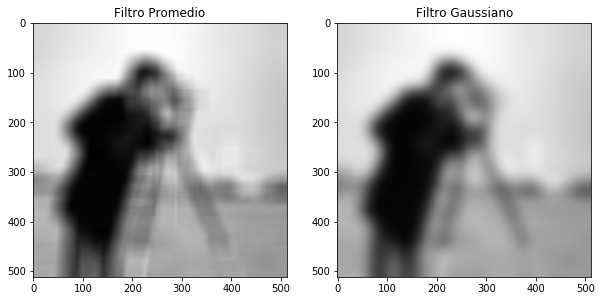

In [14]:
# Cargamos la imagen del fotografo y hacemos un remuestreo a lo "bruto"
cam = data.camera()

sigma = 15
k = np.ones((3*sigma, 3*sigma))
fot_px_mean = filters.rank.mean(cam, k)
fot_px_gauss = filters.gaussian(cam, sigma)

print("primer tipo: {} , segundo tipo {}".format(fot_px_mean.dtype, fot_px_gauss.dtype))
titles = ['Filtro Promedio', 'Filtro Gaussiano']
skdemo.imshow_all(fot_px_mean, fot_px_gauss, titles=titles)


<div style="padding:10px; border-radius:10px; border:2px solid #A43D39; background:#EEEEEE">
<span style="color:#A43D39"><h3>**Importante:**</h3></span> Note que la aplicación del filtro promedio difumina mucho más los bordes que un filtro gaussiano, por esta razón se prefiere un Filtro Gaussiano sobre un Filtro Promedio para suavizar la imagen. </div>


# Filtros de Realzado

Los Filtros de Realzado (o filtros Paso Alto) se usan para resaltar los detalles “finos” de la imagen y/o para recuperar cierto detalle perdido durante su captura. Es por esta razón que estos filtros están asociados, con la detección de bordes.

En este sentido, los filtros de realzado acentúan los bordes en la imagen, aunque también suelen resaltan cualquier ruido o imperfección que haya en la misma.



## Máscara Unsharp

La máscara unsharp es un filtro lineal que permite resaltar los bordes de la imagen. Para ello, el filtro identifica los bordes a partir de una resta entre la imagen original y su versión suavizada. A continuación,  dichos bordes son intensificados y sumados a la imagen original.

Al igual que otro tipo de filtros, si se va a aplicar a imágenes en color, la aplicación se debe hacer a cada canal de manera independiente. 

<div style="padding:10px; border-radius:10px; border:2px solid #4BACC6; background:#EEEEEE">
<span style="color:#4BACC6" ><h3>**Para Tener en Cuenta:**</h3></span> De acuerdo a la documentación de este filtro en `Skimage`, se obtienen mejores resultados cuando se aplica a la imagen en modelos de color como **HSV, HSL, YUV o YCbCr**.</span>


Debe ter cuidado con la aplicación de los filtros basados en los bordes de las imágenes puesto que estos pueden generar valores de intensidad negativos. En este sentido se recomienda usar siempre imágenes de tipo real, además que se debe usar la función <span style="background-color:#DDDDDD; color:blue; font-family:Courier new">clip</span> de `NumPy` para reestablecer los niveles de gris de la imagen al rango [0,1], una vez se realcen los bordes.

Ahora sí, veamos la aplicación de este filtro en `Skimage`:

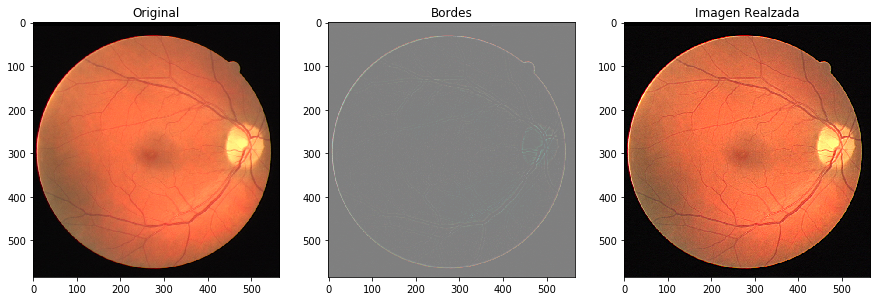

In [3]:
# Cargamos una de las imagenes de la práctica
eye = util.img_as_float(io.imread("imagenes/eye_vesels.png"))

# Aplicamos el filtro a cada canal por separado (la versión 1.5 tiene la funcion, la 1.4 NO!!!)
#R = filters.unsharp_mask(eye[:,:,0], radius=5, amount=2)
#G = filters.unsharp_mask(eye[:,:,1], radius=5, amount=2)
#B = filters.unsharp_mask(eye[:,:,2], radius=5, amount=2)

# Si tiene instalada la versión 1.4 el camino es más largo ...
radius = 2 # Radio del filtro gaussiano 
amount = 1 # Cantidad de veces que se suman los bordes a la imagen original

# Como la imagen es a color, el proceso debe hacerse en cada canal
b_R = filters.gaussian(eye[:,:,0], sigma=radius, mode='reflect')
R = eye[:,:,0] + (eye[:,:,0] - b_R) * amount

b_G = filters.gaussian(eye[:,:,1], sigma=radius, mode='reflect')
G = eye[:,:,1] + (eye[:,:,1] - b_G) * amount

b_B = filters.gaussian(eye[:,:,2], sigma=radius, mode='reflect')
B = eye[:,:,2] + (eye[:,:,2] - b_B) * amount

# La función np.clip corrige los valores de la imagen para que queden en el rango adecuado [0, 1]
eye_unsharp = np.zeros(eye.shape)
eye_unsharp[:,:,0] = np.clip(R, 0, 1)
eye_unsharp[:,:,1] = np.clip(G, 0, 1)
eye_unsharp[:,:,2] = np.clip(B, 0, 1)

# Recuerde que el borde es: original - suavizada
# Además, para visualizar los bordes sumamos el valor 0.5 (o 128 en imágenes uint8) a esos bordes
edges = np.zeros(eye.shape)
edges[:,:,0] = np.clip(eye[:,:,0] - b_R, 0, 1)+0.5
edges[:,:,1] = np.clip(eye[:,:,1] - b_G, 0, 1)+0.5
edges[:,:,2] = np.clip(eye[:,:,2] - b_B, 0, 1)+0.5

# Visualizamos las imágenes
skdemo.imshow_all(eye, edges, eye_unsharp, titles=["Original", "Bordes", "Imagen Realzada"])


## Filtro Laplaciano

Como se mencionó, el Filtro Laplaciano es un filtro basado en segunda derivada. Es así que este filtro busca los píxeles de la imagen en los que hay un mínimo o máximo relativo (al principio o al final de un cambio tipo rampa o escalón).

En `skimage` este tipo de filtro se puede aplicar usando la función <span style="background-color:#DDDDDD; color:blue; font-family:Courier new">filters.laplace</span> o bien definiendo la máscara y usando la función <span style="background-color:#DDDDDD; color:blue; font-family:Courier new">ndimage.convolve</span> de `scipy`.

Al igual que con la Máscara Unsharp, se debe tener cuidado de volver a llevar al rango [0,1] los valores de intensidad para imágenes de tipo real y al rango [0, 255] para imágenes de tipo entero.


In [ ]:
# Trabejemos ahora solo con un solo canal
eye_gray = color.rgb2gray(eye)

# Aplicamos el operador laplaciano usando la función de skimage
eye_lp1 = filters.laplace(eye_gray)
eye_1 = np.clip(eye_gray + eye_lp1, 0, 1)

# Este kernel es el mismo usado en la función filters.laplace
k1 = np.array([[0, -1, 0], 
               [-1, 4, -1], 
               [0, -1, 0]])

eye_lp2 = ndimage.convolve(eye_gray, k1)
eye_2 = np.clip(eye_gray + eye_lp2, 0, 1)

k2 = np.array([[-1, -1, -1], 
               [-1, 8, -1], 
               [-1, -1, -1]])

eye_lp3 = ndimage.convolve(eye_gray, k2)
eye_3 = np.clip(eye_gray + eye_lp3, 0, 1)

plt.imshow(eye_gray, cmap="gray")
skdemo.imshow_all(eye_lp1, eye_lp2, eye_lp3, titles=["Laplaciano skimage", "Laplaciano 4", "Laplacinao 8"])
skdemo.imshow_all(eye_1, eye_2, eye_3, titles=["Imagen Realzada skimage", "Imagen Realzada Lap 4", "Imagen Realzada Lap 8"])

Note que si bien el Filtro Laplaciano mejora los bordes, al ser un operdaor de segunda derivada hace que este aumente considerablemente el ruido en la imagen.


# Entregable de la Práctica


### Ejercicio 1. Eliminación del fondo en una Imagen

Existe una gran variedad de problemas en Visión Artificial en los que es necesario eliminar el fondo de la imagen con el fin de aislar los objetos de interés de la misma. Una de esas aplicaciones tiene que ver con el conteo de objetos. 

Por ejemplo, la imagen que se muestra a continuación correponde a una imagen tomada de una muestra de arroz.  

![Arroz](imagenes/rice.png)

Normalmente, lo que se busca es contar (automáticamente) el número de arroces en la imagen, sin embargo, antes de contar usted debe:
1. Estimar una imagen que represente el fondo de la escena. Esto se hace aplicando los filtros Promedio y Gaussiano con, al menos, 4 tamaños de kernel (para el filtro promedio) y diferentes valores de $\sigma$ (para el filtro Gaussinao), ambos con valores entre 20 y 60. **NOTA: ** tenga cuidado con los tipos de las imágenes al realizar estas operaciones!
3. Visualice y compare los fondos estimados con los diferentes filtros. Escoja el mejor de cada tipo de filtro y explique porque el filtro escogido es el mejor.
2. Una vez se estimen los dos fondos (uno por tipo de filtro), se toma la imagen original y a esta se le substrae el fondo estimado.
3. Responda: ¿Con la aplicación de estos filtros se logra el objetivo de aislar los arroces por completo?  Explique su respuesta, enfatizando las razones del porqué funciona o no la estrategia planteada.

In [ ]:
# Desarrollo del Ejercicio 1
# INTEGRANTES:
# JULIAN HERRERA
# JUAN CAMILO VAHOS
#Importar librerias y paquetes necesarios
# Siempre que usemos matplotlib en Jupyter es necesario poner esta línea antes de cualquier otra
%matplotlib inline

# Importamos las bibliotecas necesarias y les asigamos un alias
import skimage                           # Biblioteca para la manipulación de imágenes
import numpy as np                       # Biblioteca para la manipulación de matrices
import cv2

# Importamos algunos paquetes específicos
from matplotlib import pyplot as plt     # Biblioteca para crear graficas y mostrar las imágenes en pantalla
from skimage import data                 # Paquete con imágenes de prueba
from skimage import io                   # Paquete para lectura/escritura de imágenes

from skimage import color                # Paquete con las operaciones de transformaciones entre espacios de color
from skimage import exposure             # Paquete con las funciones para calcular y alterar el histograma

import skdemo                            # Paquete ESPECIAL ADJUNTO con algunas funciones extra de visualización

####################
from skimage import filters              # Paquete que contiene las máscaras y filtros de suavizado y realzado
from skimage import util                 # Paquete que contiene las funciones para cambiar el tipo de dato de las imágenes

from scipy import ndimage                # Usamos esta biblioteca para realizar la operación de convolución


# Con este nos aseguramos que las imagenes en niveles de gris, se vean como tal siempre.
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

# rice = util.img_as_float(io.imread("imagenes/rice.png"))
rice = io.imread("imagenes/rice.png")
print(rice.shape)
print ("Tipo de dato de la imagen Original: ", rice.dtype)

# PROMEDIO
avg_1 = filters.rank.mean(rice, np.ones((21,21)))
avg_2 = filters.rank.mean(rice, np.ones((31,31)))
avg_3 = filters.rank.mean(rice, np.ones((49,49)))
avg_4 = filters.rank.mean(rice, np.ones((59,59)))

# GAUSSIANO
cop1 = util.img_as_float(rice.copy())
rice_gauss_20 = filters.gaussian(cop1, sigma=20)
rice_gauss_30 = filters.gaussian(cop1, sigma=30)
rice_gauss_40 = filters.gaussian(cop1, sigma=40)
rice_gauss_50 = filters.gaussian(cop1, sigma=50)
rice_gauss_60 = filters.gaussian(cop1, sigma=60)


# # Mostramos las imágenes
skdemo.imshow_all(rice, avg_1, avg_2, avg_3, avg_4, titles=["Imagen Original", "kernel 21x21", "kernel 31x31", "kernel 49x49", "kernel 59x59"])
skdemo.imshow_all(rice_gauss_20, rice_gauss_30, rice_gauss_40, rice_gauss_50, rice_gauss_60, titles=["gaussiano 20", "gaussiano 30", "gaussiano 40","gaussiano 50","gaussiano 60"])


img_final_1 = (rice - avg_4)
img_final_2 = (cop1 - rice_gauss_60)


# img_final_2 = np.clip(img_final_2, 0,1)
# img_final[img_final > 255] = 255
# img_final = img_final.astype(np.uint8)
# img_final = np.clip(img_final, 0,1)
skdemo.imshow_all(rice, img_final_1, rice, img_final_2, titles=["Original", "Arroces Promedio", "Original", "Arroces gaussiano"])
skdemo.imshow_with_histogram(img_final_1)
skdemo.imshow_with_histogram(img_final_2)

# Probamos con un kernel grande de 200 x 200
avg_5 = filters.rank.mean(rice, np.ones((200,200)))
img_final_200 = (rice - avg_5)
skdemo.imshow_all(avg_5, img_final_200, titles = ["kernel 200x200", "Arroces con kernel 200"])



# Probamos disminur ruido con un filtro promedio y luego con un filtro gaussiano
avg_sin_ruido = filters.rank.mean(img_final_200, np.ones((5,5)))
gauss__sin_ruido = filters.gaussian(img_final_200, sigma=2)
img_titles = ["Con ruido", "Promedio - Sin ruidos", "Gaussiana - Sin ruidos"]
skdemo.imshow_all(img_final_200, avg_sin_ruido, gauss__sin_ruido, titles = img_titles)


### Discusión Ejercicio 1:

En el caso del filtro promedio, al aplicar los diferentes Kernel sobre la imagen se podía observar que a medida que se aumentaba el valor del mismo, la imagen resultante se acercaba más al fondo de la imagen original, esto debido a que el efecto de suavizado o difuminado aumenta a medida que es más grande le tamaño de la máscara, disminuyendo la intensidad en los pixeles más brillantes, por esta razón se elige el kernel 59 x 59.
Con el filtro Gaussiano según el resultado obtenido en todas las imágenes, a medida que se aumenta el sigma las variaciones entre una imagen y otra no son muy significativas, pero si se puede percibir aumento en el suavizado, por tal razón se elige el filtro con sigma mayor en esta caso sigma = 59

Con la aplicación del filtro promedio para obtener una imagen cercana al fondo y posteriormente realizar la resta de esta imagen con la imagen original se eliminan los pixeles que coinciden entre el fondo y la imagen original y persisten  aquellos que no tienen coincidencia entre sí, generando  el aislamiento de los arroces de manera muy efectiva, si se genera el histograma de esta imagen podemos observar como existen dos acumulaciones de pixeles pronunciadas a lado y lado de este, dichas acumulaciones representa la parte más clara de la imagen (fondo claro) acumulándose al lado derecho, y la acumulación del lado izquierdo serían los niveles de grises de los arroces y los puntos (ruido), una observación que vale la pena tener en cuenta es que a pesar de que se logra una separación de los arroces, persiste algo de ruido que se evidencia en algunos puntos en la imagen.
Adicional a los kernel sugeridos por el profesor se realiza una prueba adicional con un kernel mucho mayor de 200 X 200 lo que genera un fondo más cercano al original e incluso al realizar la resta el ruido es menor y los arroces siguen aislados.

En cuanto al filtro Gaussiano, al realizar la resta entre la imagen del filtro y la imagen original, se puede notar en la imagen resultante que no existe una gran diferenciación entre el fondo y los objetos que se quieren aislar, lo que nos dice que esta técnica no es muy eficiente para realizar el aislamiento de estos objetos, incluso al revisar el histograma de la imagen resultante vemos que existen dos picos importantes, pero ambos están al lado izquierdo del histograma, el pico de más a la izquierda representa el fondo y el siguiente representa el nivel de gris (grises oscuros) de los arroces lo que confirma que existe muy poca diferencia entre el fondo y los arroces.

Finalmente nos aventuramos a eliminar  (o por lo menos disminuir) el ruido de la imagen resultante aplicando nuevamente filtros (promedio y gaussiano) y obtuvimos que el ruido disminuyo pero al suavizar la imagen su claridad fue menor

### Ejercicio 2.
Uno de los problemas más tratados en el análisis de imágenes es la extracción de las venas en imágenes 
del nervio óptico, como se ilustra a continuación (**OJO**: las imágenes no corresponden pero pretenden 
ilustrar la idea de lo que se debe hacer).
![Ojos](imagenes/ojos_seg.png)

Eliminar el background de la imagen `eye_vesels.png` siguiendo un procedimiento similar al descrito en el punto anterior. Use su creatividad para hacer la estimación del background y pruebe con diferentes filtros de suavizado con diferentes tamaños de máscaras. Use su creatividad y los otros temas del curso visto para tratar de llegar a la imagen en blanco y negro de las venas a partir de la imagen a color dada. Muestre los resultados parciales que va obteniendo y justifique la selección de las operaciones realizadas. 

In [ ]:
img_eye = io.imread('imagenes/eye_vesels.png')

img_to_try = color.rgb2gray(util.img_as_float(img_eye))
# skdemo.imshow_with_histogram(img_eye)
# skdemo.imshow_with_histogram(img_eye[:,:,0])
# img_edges = filters.sobel(util.img_as_float(img_eye[:,:,0]) )

#Three ways to find the edge magnitude: http://scikit-image.org/docs/dev/api/skimage.filters.html 
#img_edges = filters.scharr(img_to_try)
#img_edges = filters.prewitt(img_to_try)
img_edges = filters.sobel(img_to_try)

#filtro roberts
img_edges_rob = filters.roberts(img_to_try)

# skdemo.imshow_with_histogram(img_to_try)

print("Image type after remove background: {}".format(img_edges.dtype) )

#we try it with diferent sigma values to analyze the changes 
# img_result_gaussian = filters.gaussian(img_edges, sigma=2.0)
# img_result_gaussian = filters.gaussian(img_edges, sigma=3.0)

#aplicando este filtro gaussiano a los bordes encontrados en el filtro 
img_result_gaussian = filters.gaussian(img_edges, sigma=5.5 )

#aplicando este filtro gaussiano a los bordes encontrados en el filtro roberts se obtiene
# un resultado muy cercano a lo que se desea
img_result_gaussian_rob = filters.gaussian(img_edges_rob, sigma=2.5) 
plt.imshow(img_result_gaussian_rob)
images_titles = ["Original", "Edges", "Gaussian result"]
skdemo.imshow_all(img_to_try, img_edges, img_result_gaussian, titles= images_titles)

# sobreponer resultado porque el matplotlib me permite ver a mas detalle el resultado de la op. Gaussian
plt.imshow(img_result_gaussian + img_result_gaussian_rob) 

# tambien vale la pena mirar el negativo de la imagen a modo de analisis de los resultados obtenidos
#plt.imshow(1 - (img_result_gaussian + img_result_gaussian_rob) )

### Discusión Ejercicio 2:

Lo primero que hicimos, fue analizar el histograma para determinar como se puede atacar el problema de segmentacion de las vasos sanguineos en la imagen ocular, observamos que hay una alta predominancia del color rojo, pero hay un color rojo de background muy similar al de algunos tonos de los vasos sanguineos, por lo cual se pierde informacion si trabajamos con el canal 0 ( Red ), por otro lado se nos ocurre convertir la imagen a escalas de grises con la funcion rgb2gray del modulo color que nos provee skimage en el que se nos ocurre resaltar los bordes de la imagen ya que en el histograma encontramos una acumulacion de grises en la zona intermedia del histograma, lo cual nos permitiria realzar los detalles que en este caso son los vasos sanguineos...profundizando en las funciones que provee el modulo de filters: http://scikit-image.org/docs/dev/api/skimage.filters.html  con los cuales se puede lograr obtener la magnitud de los bordes y eliminar el background (muy similar a lo que hace unsharp mask) y posterior a este resultado hacer un suavizado de la imagen con un filtro gaussian para resaltar los vasos sanguineos.

### Ejercicio 3. 

Como se puede observar en la práctica, el Filtro Laplaciano, por ser un filtro basado en la segunda derivada, aumenta considerablemente el ruido en la imagen. Una opción para el este filtro es el Laplaciano de un Gaussiano. Aunque este filtro no está disponible en `Skimage` si se puede simular usando las funciones `ndimage.gaussian_laplace` y `ndimage.convolve` de la blioteca de funciones de `scipy`.

Con base en lo anterior:
1. Cree una función que dada una imagen aplique un filtro LoG a la misma usando un valor de $\sigma$ dado.
1. Cargue la imagen de la hoja que se encuentra el directorio de la práctica
3. Genere 4 imágenes más para mejorar la imagen de la `hoja.png`: usando una mascara unsharp, usando los laplacianos (4 y 8) y usando un LoG.
4. Visualice, compare y discuta los resultados obtenidos de los bordes.
5. Ahora compare los resultados del realzado y discuta sobre si hay alguna diferencia. Hay alguno que funciona mejor?	Cuál escogería entre ellos y por qué?


In [ ]:
# Desarrollo del Ejercicio 3

def laplace_of_gaussian(img_hoja_gray, sigma=0.7):
      
    img_hoja_gauss = filters.gaussian(img_hoja_gray, sigma)

    img_hoja_LoG = np.zeros(img_hoja_gray.size)

    # Aplicamos el laplaciano usando la función de skimage
    img_hoja_LoG = filters.laplace(img_hoja_gauss)
    hoja_Realzada = np.clip(img_hoja_gauss + img_hoja_LoG, 0, 1)
    
    
    return img_hoja_LoG, hoja_Realzada

img_hoja = io.imread('imagenes/hoja.png')
img_hoja_gray = color.rgb2gray(util.img_as_float(img_hoja))


# Hacemos el llamdo a la funcion para calcular el LoG y su realzado
LoG, r = laplace_of_gaussian(img_hoja_gray)
skdemo.imshow_all(LoG, r, titles=["LoG", "LoG realzado"])

# Usando una mascara Unsharp

hoja_float = img_hoja_gray

radius1 = 2 # Radio del filtro gaussiano 
radius2 = 10 # Radio del filtro gaussiano 
amount = 1 # Cantidad de veces que se suman los bordes a la imagen original


gaus1 = filters.gaussian(hoja_float, sigma=radius1, mode='reflect')
Uns1 = hoja_float + (hoja_float - gaus1) * amount
gaus2 = filters.gaussian(hoja_float, sigma=radius2, mode='reflect')
Uns2 = hoja_float + (hoja_float - gaus2) * amount

hoja_unsharp1 = np.zeros(hoja_float.shape)
hoja_unsharp1 = np.clip(Uns1, 0, 1)
hoja_unsharp2 = np.zeros(hoja_float.shape)
hoja_unsharp2 = np.clip(Uns2, 0, 1)

edges1 = np.zeros(hoja_float.shape)
edges1 = np.clip(hoja_float- gaus1, 0, 1)+0.5
edges2 = np.zeros(hoja_float.shape)
edges2 = np.clip(hoja_float- gaus2, 0, 1)+0.5

skdemo.imshow_all(edges1, hoja_unsharp1, titles=["Bordes Unsharp radius 1", "unsharp r1 Realzada"])
skdemo.imshow_all(edges2, hoja_unsharp2, titles=["Bordes Unsharp radius 10", "unsharp r10 Realzada"])

# USANDO LAPLACIANO 4
original_lp4 = img_hoja_gray

k1 = np.array([[0, -1, 0], 
               [-1, 4, -1], 
               [0, -1, 0]])

hoja_lp4 = ndimage.convolve(original_lp4, k1)
hoja_lp4_realzada = np.clip(original_lp4 + hoja_lp4, 0, 1)

# Visualizamos las imágenes
skdemo.imshow_all(hoja_lp4, hoja_lp4_realzada,  titles=["Laplaciano 4", "lp4 Realzada"])

# USANDO LAPLACIANO 8
original_lp8 = img_hoja_gray

k2 = np.array([[-1, -1, -1], 
               [-1, 8, -1], 
               [-1, -1, -1]])

hoja_lp8 = ndimage.convolve(original_lp8, k2)
hoja_lp8_realzada = np.clip(original_lp8 + hoja_lp8, 0, 1)

# Visualizamos las imágenes
skdemo.imshow_all(hoja_lp8, hoja_lp8_realzada,  titles=["Laplaciano 8", "lp8 Realzada"])



### Discusión Ejercicio 3:

En cada una de las imágenes resultantes es evidente que se resaltan los bordes ya que estos son filtros de realzado, pero es evidente que el filtro unsharp es el que mejor resalta los bordes, resaltando los detalles finos de la imagen y detectando más detalladamente los bordes.

Algo curioso que encontramos fue que al aumentar el radio de filtro gaussiano (r = 10) se resaltan aún más los bordes en especial el contorno de la hoja favoreciendo esto al realce de la imagen.

Respecto al realzado de las imágenes podemos ver que en algunos casos resaltan mas, es decir, los bordes y detalles son más evidentes en unas imágenes que en otras dependiendo del filtro usado, por ejemplo, existe una pequeña mancha al lado derecho de la hoja la cual se resalta fuertemente tanto en el filtro LoG como en el filtro Unsharp, pero es menos evidente en los laplacianos; siendo menos funcional `para este caso` el laplaciano 8 ya que este no realza muy fuertemente la imagen y sus detalles, de hecho la muestra más confusa que el resto de los realces resultantes, es también muy evidente que los realzados con filtro Unsharp son más notorios ya que se puede ver con más claridad los detalles y el refuerzo que tiene la imagen en sus respectivos bordes, es por esta razón que nos parece que este último realce (Unsharp) es el que mejor funciona.